# Abstract

Customer segmentation is a vital strategy for businesses seeking to tailor their marketing efforts and enhance customer satisfaction. By dividing customers into distinct groups based on shared characteristics, such as purchasing behavior, demographics, or preferences, businesses can better understand and meet the unique needs of each segment. This paper explores the process of customer segmentation and its significance in modern marketing. Through the application of data analysis techniques, including RFM (Recency, Frequency, Monetary) analysis and clustering algorithms such as K-means, businesses can identify meaningful customer segments and develop targeted marketing strategies to improve customer acquisition, retention, and loyalty.

# Introduction

This notebook aims at analyzing the content of an E-commerce database that lists purchases made by  ∼
 4000 customers over a period of one year (from 2010/12/01 to 2011/12/09).

# Importing Required Libraries 
Numpy For linear algebra |
Pandas For Data processing, CSV file I/O (e.g. pd.read_csv) |
Matplotlib For Data Visualizations

In [1]:

import numpy as np 
import pandas as pd 

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

C:\Users\aagam\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
retail_df = pd.read_csv('retail_Dataset.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


This dataframe contains 8 variables that correspond to: 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. <br>
**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. Nominal. <br>
**Quantity**: The quantities of each product (item) per transaction. Numeric.	<br>
**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. Numeric, Product price per unit in sterling. <br>
**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. Nominal, the name of the country where each customer resides.<br>

# Creating a new column "Amount" by multiplying "Quantity" and "Unit Price"



In [3]:
retail_df["Amount"]= retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08


# Counting Null fields 

In [4]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Amount              0
dtype: int64

# Datatypes of Features

In [5]:
retail_df.dtypes 


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

# Brief summary for columns whose data types are NOT NUMBER

In [6]:
retail_df.describe(exclude="number")  


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478


We can notice that most of the transactions are from the country United Kingdom

# Summary for columns whose data types are NUMBER



In [7]:
retail_df.describe() 

,Quantity,UnitPrice,Amount
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


# Number of rows and  columns

In [8]:
retail_df.shape 


(541909, 9)

# Converting a column's datatype to datetime



In [9]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [10]:
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Fetching proportions of Country with the parameter "normalize=True"

In [11]:
retail_df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

# Proportion of UK customers



In [12]:
retail_df[retail_df["Country"]=="United Kingdom"].CustomerID.nunique() / retail_df.CustomerID.nunique() 


0.903476669716377

# Observations:
90% of the customers are from UK

# Forming a sub-sample which includes only the customers from UK



In [13]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.shape

(495478, 9)

# Removing canceled orders

In [14]:

retail_uk = retail_uk[retail_uk['Quantity']>0]
retail_uk.shape


(486286, 9)

# Removing rows where customerID are NA since going to do CUSTOMER SEGMENTATION



In [15]:
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True) 

retail_uk.shape


(354345, 9)

# Average total quantity ordered by a customer

In [16]:
np.mean(retail_uk.groupby("CustomerID").Quantity.sum())

1088.87324662076

# Average total amount spent by a customer



In [17]:
np.mean(retail_uk.groupby("CustomerID").Amount.sum())

1863.9101132364192

# Exploring the unique values of each attribute



In [18]:
print("Summary: ")
print("Number of invoices: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Average quantity of product purchased by a customer: ", round(np.mean(retail_uk.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(retail_uk.groupby("CustomerID").Amount.sum()), 2))
print("Average product quantity sold per transaction: ", round(retail_uk.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(retail_uk.Amount.mean(), 2) )

Summary: 
Number of invoices:  16649
Number of products bought:  3645
Number of customers: 3921
Average quantity of product purchased by a customer:  1089.0
Average revenue generated per customer:  1863.91
Average product quantity sold per transaction:  12.0
Average revenue generated per transaction:  20.63


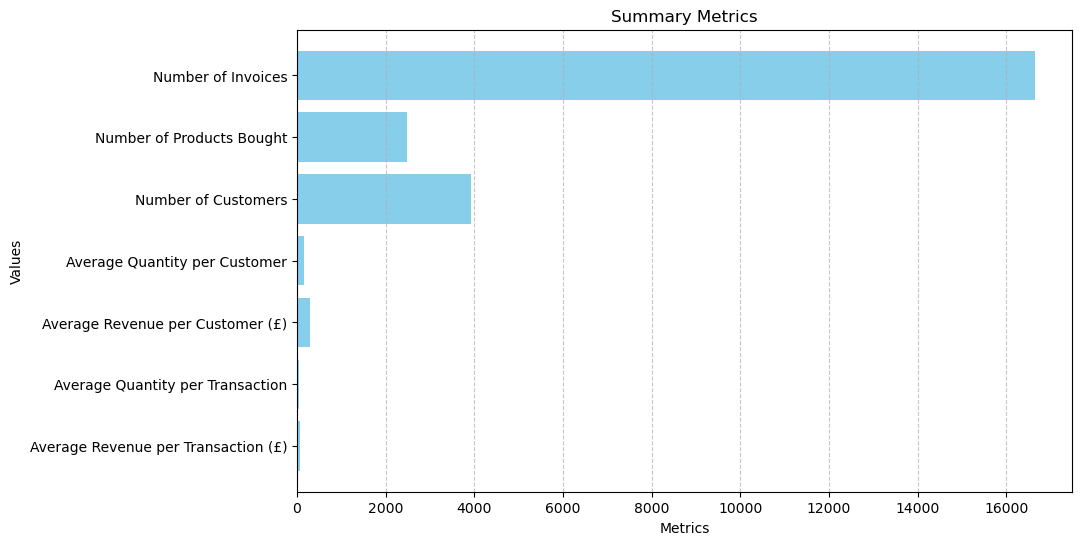

In [19]:


# Summary data
metrics = {
    'Number of Invoices': 16649,
    'Number of Products Bought': 2493,
    'Number of Customers': 3921,
    'Average Quantity per Customer': 167.0,
    'Average Revenue per Customer (£)': 293.3,
    'Average Quantity per Transaction': 39.0,
    'Average Revenue per Transaction (£)': 69.07
}

# Create lists to store metric names and values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(metric_names, metric_values, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Summary Metrics')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show()


The average revenue generated per customer (£293.3) suggests a decent level of customer loyalty or repeat business. Higher average revenue per customer often indicates stronger customer relationships and potential for upselling or cross-selling strategies.

# check for NaN's values to see if dataset is ready to go



In [20]:

retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  object        
 7   Country      354345 non-null  object        
 8   Amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.0+ MB


# Create a new column called date which contains the date of invoice only


In [21]:
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [22]:
retail_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [23]:
min(retail_uk['date'])

datetime.date(2010, 12, 1)

In [24]:
max(retail_uk['date'])

datetime.date(2011, 12, 9)

In [25]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

In [26]:
retail_uk['month'] = retail_uk['date'].dt.month

# Group the DataFrame by the 'month' column and count the number of transactions in each month
monthly_transaction_counts = retail_uk.groupby('month').size()

# Optionally, you can convert the month number to month names for better readability
# You can create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map month numbers to month names
monthly_transaction_counts.index = monthly_transaction_counts.index.map(month_names)

print("Frequency of transactions in each month:")
print(monthly_transaction_counts)

Frequency of transactions in each month:
month
January      18161
February     17759
March        24014
April        20866
May          25203
June         23714
July         23599
August       23105
September    35636
October      43735
November     58809
December     39744
dtype: int64


In [27]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

# Extract month and year from the date column
retail_uk['year_month'] = retail_uk['date'].dt.strftime('%b %Y')

# Group the DataFrame by the 'year_month' column and count the number of transactions in each month-year combination
monthly_transaction_counts = retail_uk.groupby('year_month').size()

# Sort the data month and year-wise
monthly_transaction_counts = monthly_transaction_counts.sort_index()

print("Frequency of transactions in each month and year (sorted):")
print(monthly_transaction_counts)

Frequency of transactions in each month and year (sorted):
year_month
Apr 2011    20866
Aug 2011    23105
Dec 2010    23943
Dec 2011    15801
Feb 2011    17759
Jan 2011    18161
Jul 2011    23599
Jun 2011    23714
Mar 2011    24014
May 2011    25203
Nov 2011    58809
Oct 2011    43735
Sep 2011    35636
dtype: int64


We can see that in nov the amount of orders has been the highest



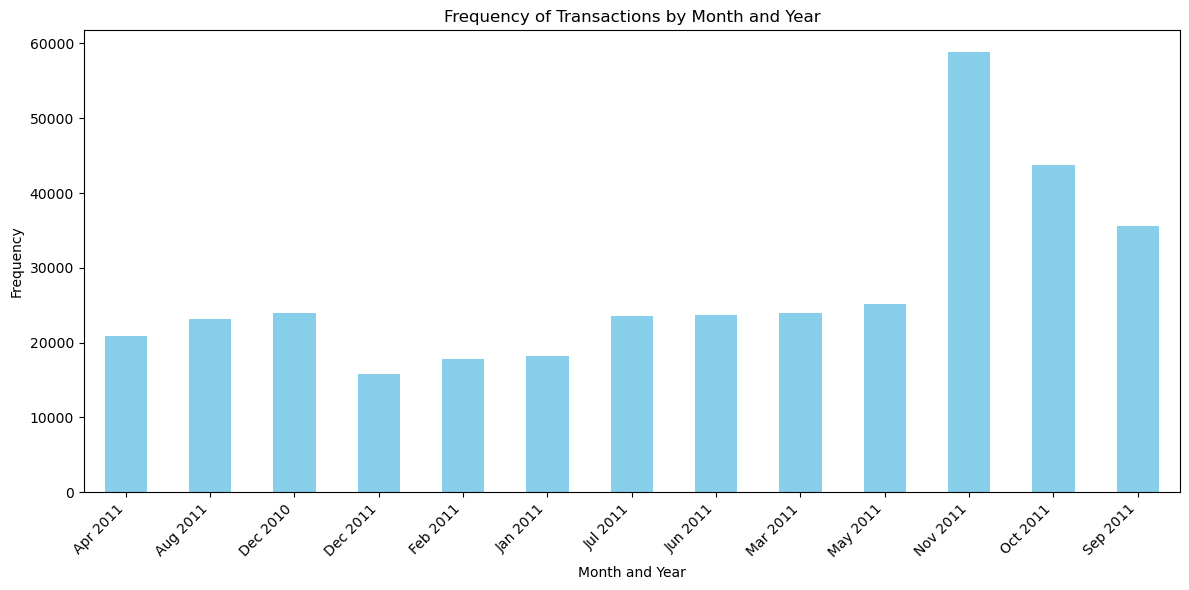

In [28]:
plt.figure(figsize=(12, 6))
monthly_transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Transactions by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# CREATING RECENCY DATAFRAME
group by customers and check the last date of purchase

In [29]:

recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head(20)


,CustomerID,LastPurshaceDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06
5,12821,2011-05-09
6,12822,2011-09-30
7,12823,2011-09-26
8,12824,2011-10-11
9,12826,2011-12-07


# Calculating recency

In [30]:
now = dt.date(2011,12,9)
now = pd.Timestamp('2011-12-9')

# Calculate recency in days
recency_df['Recency'] = (now - recency_df['LastPurshaceDate']).dt.days

# Print the DataFrame to verify the result
print(recency_df)



     CustomerID LastPurshaceDate  Recency
0         12346       2011-01-18      325
1         12747       2011-12-07        2
2         12748       2011-12-09        0
3         12749       2011-12-06        3
4         12820       2011-12-06        3
...         ...              ...      ...
3916      18280       2011-03-07      277
3917      18281       2011-06-12      180
3918      18282       2011-12-02        7
3919      18283       2011-12-06        3
3920      18287       2011-10-28       42

[3921 rows x 3 columns]


In [31]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


This calculation will result in the 'Recency' column containing the number of days between the last purchase date for each customer and December 9, 2011 (the now date). This metric represents how recent each customer's last purchase was relative to the specified date.

# Droping LastPurchaseDate as it is not needed anymore


In [32]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# CREATING FREQUENCY DATAFRAME
droping duplicates

In [33]:
retail_uk.shape

(354345, 12)

In [34]:
# Assuming retail_uk is the DataFrame name
duplicate_transactions = retail_uk[retail_uk.duplicated(subset=['CustomerID', 'InvoiceNo'], keep=False)]

# Display the duplicate transactions
print(duplicate_transactions)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice CustomerID         Country  Amount  \

In [35]:
import pandas as pd

# Assuming retail_uk is the DataFrame name
# Calculate the count of products for each transaction
retail_uk['ProductCount'] = retail_uk.groupby(['CustomerID', 'InvoiceNo'])['StockCode'].transform('count')

# Filter out duplicate transactions
filtered_retail_uk = retail_uk.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])

# Display the filtered DataFrame
filtered_retail_uk


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date,month,year_month,ProductCount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,12,Dec 2010,7
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,2010-12-01,12,Dec 2010,2
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2010-12-01,12,Dec 2010,12
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2010-12-01,12,Dec 2010,4
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,2010-12-01,12,Dec 2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581,United Kingdom,12.48,2011-12-09,12,Dec 2011,2
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,2011-12-09,12,Dec 2011,2
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,2011-12-09,12,Dec 2011,2
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,2011-12-09,12,Dec 2011,21


In [36]:
filtered_retail_uk.shape

(16649, 13)

After executing this code, the filtered_retail_uk DataFrame will contain only unique combinations of 'InvoiceNo' and 'CustomerID', effectively removing duplicate transactions associated with the same customer invoice.








# Calculating frequency of purchases



In [37]:
frequency_df = filtered_retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4


In [38]:
filtered_retail_uk.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16649 entries, 0 to 541890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     16649 non-null  object        
 1   StockCode     16649 non-null  object        
 2   Description   16649 non-null  object        
 3   Quantity      16649 non-null  int64         
 4   InvoiceDate   16649 non-null  datetime64[ns]
 5   UnitPrice     16649 non-null  float64       
 6   CustomerID    16649 non-null  object        
 7   Country       16649 non-null  object        
 8   Amount        16649 non-null  float64       
 9   date          16649 non-null  datetime64[ns]
 10  month         16649 non-null  int32         
 11  year_month    16649 non-null  object        
 12  ProductCount  16649 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(2), object(6)
memory usage: 1.7+ MB


# Amount spent by each individual customer

In [39]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12747,4196.01
2,12748,33719.73
3,12749,4090.88
4,12820,942.34


# RFM TABLE

merging recency dataframe with frequency dataframe, resulting a temporary dataframe

In [40]:

temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346,325,1
1,12747,2,11
2,12748,0,210
3,12749,3,5
4,12820,3,4


# Merging with monetary dataframe to get a table with the 3 columns



In [41]:

rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,11,4196.01
2,12748,0,210,33719.73
3,12749,3,5,4090.88
4,12820,3,4,942.34
...,...,...,...,...
3916,18280,277,1,180.60
3917,18281,180,1,80.82
3918,18282,7,2,178.05
3919,18283,3,16,2094.88


# Making 0's 1, As 0's in Recency column can be ignored



In [42]:
rfm_df['Recency'] = rfm_df["Recency"] + 1

# outlier treatment: the algorithm which is going to be used is vulnerable to outliers which are very very manipulative
if not exclude outliers, the results will be heavily influenced

In [43]:
Q1 = rfm_df.Recency.quantile(0.25)
Q3 = rfm_df.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= (Q1 - 1.5*IQR)) & (rfm_df.Recency <= (Q3 + 1.5*IQR))]
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,11,4196.01
2,12748,1,210,33719.73
3,12749,4,5,4090.88
4,12820,4,4,942.34
...,...,...,...,...
3916,18280,278,1,180.60
3917,18281,181,1,80.82
3918,18282,8,2,178.05
3919,18283,4,16,2094.88


# Outlier treatment for monetary



In [44]:
Q1 = rfm_df.Monetary.quantile(0.25)
Q3 = rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]
rfm_df

,CustomerID,Recency,Frequency,Monetary
4,12820,4,4,942.34
5,12821,215,1,92.72
6,12822,71,2,948.88
7,12823,75,5,1759.50
8,12824,60,1,397.12
...,...,...,...,...
3916,18280,278,1,180.60
3917,18281,181,1,80.82
3918,18282,8,2,178.05
3919,18283,4,16,2094.88


# Importing modules for k-Means Algorithm


In [45]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Scaling is crucial step to make k-Means clustering to work better

scaling Recency values to the range (0,1)



In [46]:

rfm_df["R"]= (rfm_df["Recency"]-rfm_df["Recency"].min())/(rfm_df["Recency"].max()-rfm_df["Recency"].min())


# scaling Frequency values to the range (0,1)



In [47]:
rfm_df["F"]= (rfm_df["Frequency"]-rfm_df["Frequency"].min())/(rfm_df["Frequency"].max()-rfm_df["Frequency"].min())

# scaling Monetary values to the range (0,1)



In [48]:
rfm_df["M"]= (rfm_df["Monetary"]-rfm_df["Monetary"].min())/(rfm_df["Monetary"].max()-rfm_df["Monetary"].min())
rfm_df.head()



,CustomerID,Recency,Frequency,Monetary,R,F,M
4,12820,4,4,942.34,0.009119,0.078947,0.262175
5,12821,215,1,92.72,0.650456,0.000000,0.025796
6,12822,71,2,948.88,0.212766,0.026316,0.263995
7,12823,75,5,1759.50,0.224924,0.105263,0.489524
8,12824,60,1,397.12,0.179331,0.000000,0.110486


# Observations
In this analysis, the value of the customer is inversely proportional to the Recency value and directly proportional to the Frequency and Monetary values.

# Now,forming a new DataFrame,So RFM analysis can be made



In [49]:

df = rfm_df
df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
4,12820,4,4,942.34,0.009119,0.078947,0.262175
5,12821,215,1,92.72,0.650456,0.000000,0.025796
6,12822,71,2,948.88,0.212766,0.026316,0.263995
7,12823,75,5,1759.50,0.224924,0.105263,0.489524
8,12824,60,1,397.12,0.179331,0.000000,0.110486


<Axes: >

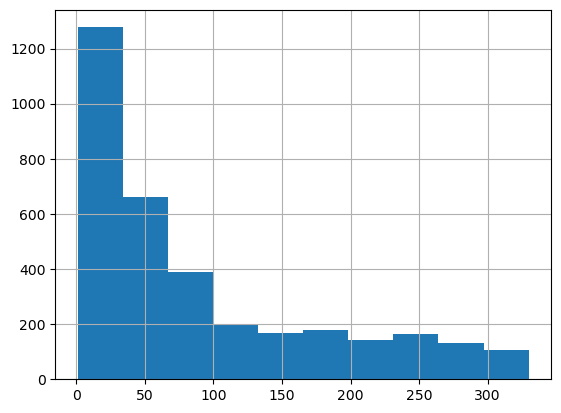

In [50]:
df["Recency"].hist()

<Axes: >

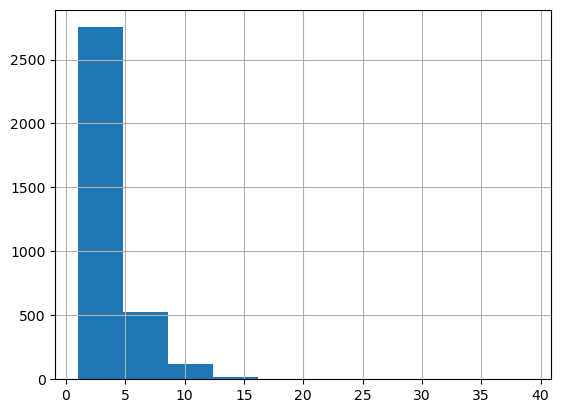

In [51]:
df["Frequency"].hist()



<Axes: >

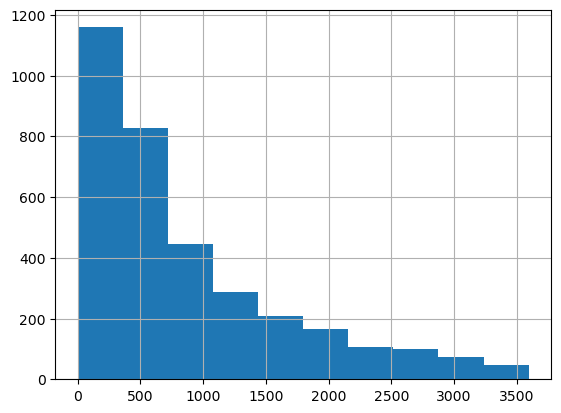

In [52]:
df["Monetary"].hist()



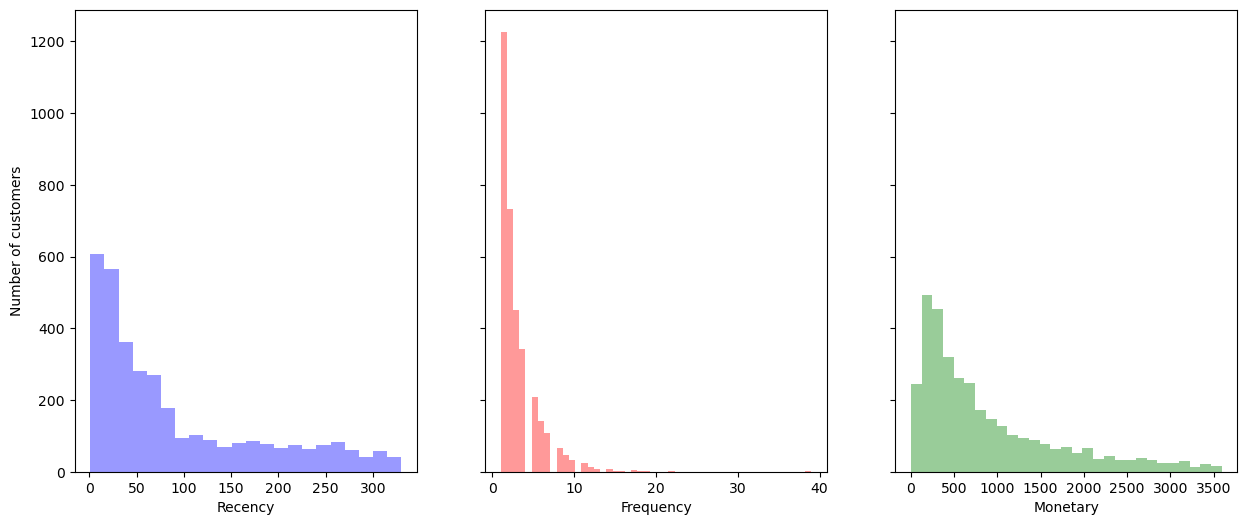

In [53]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows= 1, ncols= 3, sharey=True, figsize=(15, 6))

sns.distplot(df["Recency"], ax=ax0, kde=False, color='b')
ax0.set(xlabel="Recency", ylabel="Number of customers")

sns.distplot(df["Frequency"], ax=ax1, kde=False, color='r')
ax1.set(xlabel="Frequency")

sns.distplot(df["Monetary"], ax=ax2, kde=False, color='g')
ax2.set(xlabel="Monetary")


fig.savefig("Histograms of Attributes")

# Resetting index for future concatenate purposes



In [54]:
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12820,4,4,942.34,0.009119,0.078947,0.262175
1,12821,215,1,92.72,0.650456,0.000000,0.025796
2,12822,71,2,948.88,0.212766,0.026316,0.263995
3,12823,75,5,1759.50,0.224924,0.105263,0.489524
4,12824,60,1,397.12,0.179331,0.000000,0.110486
...,...,...,...,...,...,...,...
3416,18280,278,1,180.60,0.841945,0.000000,0.050246
3417,18281,181,1,80.82,0.547112,0.000000,0.022486
3418,18282,8,2,178.05,0.021277,0.026316,0.049537
3419,18283,4,16,2094.88,0.009119,0.394737,0.582832


# HOPKIN's STATISTICS
Tells how much data is suitable to cluster

In [55]:


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [56]:
hopkins(df[["CustomerID","R","F","M"]])




0.5638950893262674

# Forming a new DF which includes only scaled R,F,M scores



In [57]:

df_1 = df[["CustomerID","R","F","M"]]
df_1.set_index("CustomerID", inplace=True)
df_1.head(20)

,R,F,M
CustomerID,,,
12820,0.009119,0.078947,0.262175
12821,0.650456,0.000000,0.025796
12822,0.212766,0.026316,0.263995
12823,0.224924,0.105263,0.489524
12824,0.179331,0.000000,0.110486
12826,0.006079,0.157895,0.410293
12827,0.015198,0.052632,0.119675
12828,0.006079,0.131579,0.283423
12831,0.796353,0.000000,0.059831


# DENDROGRAM

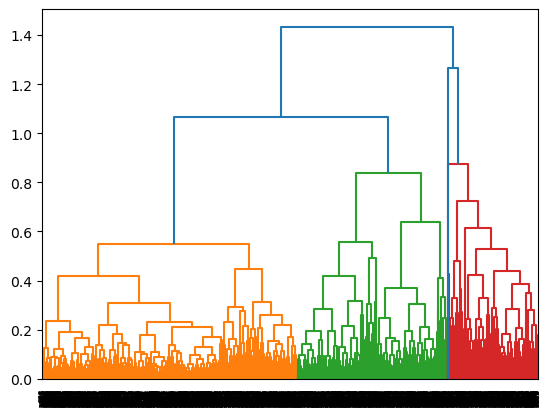

In [58]:


d = linkage(df_1, method='complete')
dendrogram(d,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [59]:
model = KMeans(n_clusters= 4, init= 'random', max_iter= 500, tol= 1e-10)

In [60]:
model.fit(df_1)
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_)
print(model.n_iter_)


[[0.11608864 0.03660847 0.16326665]
 [0.1008098  0.14144261 0.61920956]
 [0.46891173 0.02653805 0.15036858]
 [0.80898173 0.00877193 0.09349191]]
[0 3 0 ... 0 1 1]
83.81120011484114
26


model.cluster_centers_: This array contains the coordinates of the cluster centroids. Each row represents a centroid, and the columns represent the features in your dataset. Based on your output, there are four clusters, and each centroid has three dimensions/features.

The first row represents the centroid coordinates for the first cluster.
The second row represents the centroid coordinates for the second cluster.
The third row represents the centroid coordinates for the third cluster.
The fourth row represents the centroid coordinates for the fourth cluster.
Each centroid is defined by its coordinates in the feature space. For example, the first centroid has coordinates [0.1529969, 0.06306593, 0.10384616] in the feature space.

model.labels_: This array contains the cluster labels assigned to each data point in your dataset. Each element in the array represents the cluster label for the corresponding data point. The cluster labels are integers, indicating which cluster each data point belongs to.

model.inertia_: This value represents the inertia of the fitted K-means model. Inertia is the sum of squared distances of samples to their closest cluster center. It is a measure of how tightly packed the clusters are around their centroids.

model.n_iter_: This value represents the number of iterations that the K-means algorithm ran to converge. It indicates how many iterations were performed before the algorithm reached convergence.

# FIND OPTIMUM "K" for k-Means



In [61]:

from sklearn.metrics import silhouette_score
sse_ = []
ssd = []
centroids_from_kmeans = []
iterations = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters= k, init= 'random', n_init= 100, max_iter= 500, tol= 1e-10).fit(df_1)
    sse_.append([k, silhouette_score(df_1, kmeans.labels_)])
    ssd.append([k, kmeans.inertia_])
    centroids_from_kmeans.append(kmeans.cluster_centers_)
    iterations.append([k, kmeans.n_iter_])

print("Silhouette Score for each K : \n", sse_)
print("Inertia for each K : \n", ssd)
print("Number of iterations for each K : ", iterations)

Silhouette Score for each K : 
 [[2, 0.5052222674834316], [3, 0.5253591930764813], [4, 0.46802695472051875], [5, 0.43252425171841496], [6, 0.3745400463775476], [7, 0.38422074864032946], [8, 0.3761231129194975], [9, 0.348989052421005], [10, 0.35162723729173534], [11, 0.34451661228278674], [12, 0.3514780418326064], [13, 0.34342783242825836], [14, 0.33358006157630293]]
Inertia for each K : 
 [[2, 216.27211446277275], [3, 106.35677473656685], [4, 83.81120011484116], [5, 63.33656098388488], [6, 55.26696021106508], [7, 47.868393391087764], [8, 41.45228147089266], [9, 38.2048864096069], [10, 35.008311454184835], [11, 32.205568627525714], [12, 29.80776408447199], [13, 27.938551485478555], [14, 26.31503278807321]]
Number of iterations for each K :  [[2, 10], [3, 15], [4, 16], [5, 58], [6, 35], [7, 23], [8, 24], [9, 33], [10, 58], [11, 46], [12, 59], [13, 38], [14, 62]]


Loop over K values: The code iterates over a range of K values from 2 to 14.

K-means clustering: For each K value, it initializes a K-means clustering model with random initialization (init='random') and fits it to the data (df_1). It sets n_init to 100, meaning the algorithm will be run 100 times with different initial centroids to mitigate the effect of random initialization. Other parameters include max_iter and tol to control the maximum number of iterations and convergence tolerance.

Silhouette score: After fitting the K-means model, the code calculates the silhouette score for the clustering result using the silhouette_score function from sklearn.metrics. The silhouette score measures the quality of the clustering result by considering both the cohesion within clusters and the separation between clusters.

Inertia: The code also calculates the inertia for each K value. Inertia is the sum of squared distances of samples to their closest cluster center and provides a measure of how tightly packed the clusters are around their centroids.

Store results: The silhouette scores, inertia values, and number of iterations for each K value are stored in lists (sse_, ssd, iterations) for further analysis or visualization.

Print results: Finally, the code prints the silhouette scores, inertia values, and number of iterations for each K value.

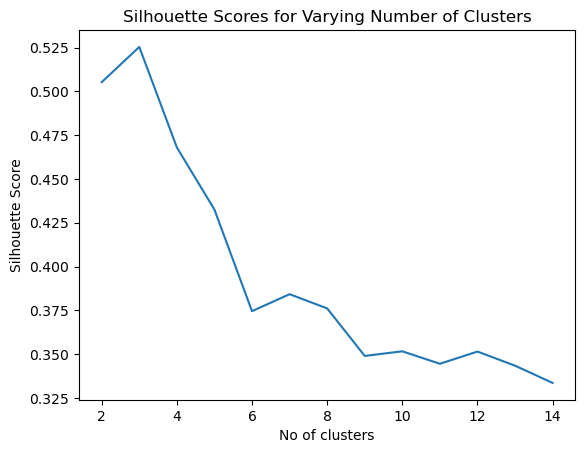

In [62]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1], label= "Silhouette Score")
plt.title("Silhouette Scores for Varying Number of Clusters")
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Score")
plt.show()

The silhouette score is a measure used to evaluate the quality of clustering results. It provides an indication of how well-separated the clusters are and how similar data points are within the same cluster.

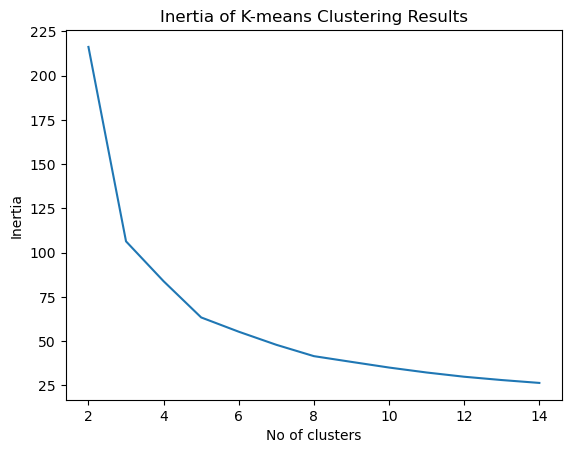

In [63]:
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1], label= "Inertia")
plt.title("Inertia of K-means Clustering Results")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

Inertia is often used as a measure of the fitness of the K-means model to the data. The goal of K-means clustering is to minimize inertia by finding cluster centroids that minimize the within-cluster sum of squares.

# FIND OPTIMUM "K" for k-Means



In [64]:

sse_ward = []

for k in range(2, 15):
    h_cluster = AgglomerativeClustering(n_clusters= k)
    h_cluster.fit(df_1)
    sse_ward.append([k, silhouette_score(df_1, h_cluster.labels_)])

print(sse_ward)

[[2, 0.4776196264960796], [3, 0.47815686161519033], [4, 0.4401558477926799], [5, 0.4043900661487338], [6, 0.3477770746880385], [7, 0.3356912524587032], [8, 0.3133762157162508], [9, 0.3206520551861039], [10, 0.30176970786757923], [11, 0.28809089871973076], [12, 0.28400841532297216], [13, 0.287515047733015], [14, 0.2902289559253929]]


Loop over K values: The code iterates over a range of K values from 2 to 14.

Hierarchical clustering: For each K value, it initializes an AgglomerativeClustering object with the specified number of clusters (n_clusters=k) and fits it to the data (df_1). The Ward linkage method is used by default, which minimizes the variance of clusters being merged.

Silhouette score: After fitting the hierarchical clustering model, the code calculates the silhouette score for the clustering result using the silhouette_score function from sklearn.metrics. The silhouette score measures the quality of the clustering result by considering both the cohesion within clusters and the separation between clusters.

Store results: The silhouette scores for each K value are stored in the sse_ward list for further analysis or visualization.

Print results: Finally, the code prints the silhouette scores for each K value.

# since low inertia and high silhouette score is desirable, let "K" (number of clusters) equals 3
This is also in parallel with what dendrogram suggests


Hierarchical Cluster Analyses to find initial seeds for k-means

In [65]:


clustering= AgglomerativeClustering(n_clusters= 3) #linkage="ward", by default
clustering.fit(df_1)

AgglomerativeClustering(n_clusters=3)

# Just checking, Agglomerative clustering results



In [66]:

labels_v0= pd.DataFrame(clustering.labels_)
print(labels_v0)
RFM_0= pd.concat([df, labels_v0], axis=1)
RFM_0.columns= ["CustomerID", "Recency", "Frequency", "Monetary", "R", "F", "M", "Cluster"]
RFM_0["Cluster"] = RFM_0["Cluster"] +1
RFM_ward= RFM_0
RFM_ward.head(10)

      0
0     2
1     0
2     2
3     1
4     2
...  ..
3416  0
3417  0
3418  2
3419  1
3420  1

[3421 rows x 1 columns]


,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
0,12820,4,4,942.34,0.009119,0.078947,0.262175,3
1,12821,215,1,92.72,0.650456,0.000000,0.025796,1
2,12822,71,2,948.88,0.212766,0.026316,0.263995,3
3,12823,75,5,1759.50,0.224924,0.105263,0.489524,2
4,12824,60,1,397.12,0.179331,0.000000,0.110486,3
5,12826,3,7,1474.72,0.006079,0.157895,0.410293,2
6,12827,6,3,430.15,0.015198,0.052632,0.119675,3
7,12828,3,6,1018.71,0.006079,0.131579,0.283423,2
8,12831,263,1,215.05,0.796353,0.000000,0.059831,1
9,12832,33,2,383.03,0.097264,0.026316,0.106566,3


It creates a DataFrame called labels_v0 containing the cluster labels assigned to each data point by a clustering algorithm (clustering).

It concatenates labels_v0 with the original DataFrame df, resulting in a new DataFrame called RFM_0. The columns of RFM_0 are renamed to include the cluster labels.

It increments the cluster labels by 1 to start from 1 instead of 0.

It assigns the modified RFM_0 DataFrame to a new DataFrame RFM_ward.

It displays the first 10 rows of the RFM_ward DataFrame.

In [67]:
Clusters_R= pd.DataFrame(RFM_ward.groupby("Cluster").R.mean())
Clusters_R

,R
Cluster,
1,0.626457
2,0.087947
3,0.130877


customers in Cluster 1 have a higher mean recency compared to customers in Clusters 2 and 3, suggesting that they have not made purchases recently. Conversely, customers in Clusters 2 and 3 have lower mean recency values, indicating more recent purchase activity.

In [68]:
Clusters_F= pd.DataFrame(RFM_ward.groupby("Cluster").F.mean())
Clusters_F

,F
Cluster,
1,0.016139
2,0.136078
3,0.034719


These values provide insights into the average frequency of purchases made by customers within each cluster. For example, customers in Cluster 2 have a higher mean frequency compared to customers in Clusters 1 and 3, suggesting that they make purchases more frequently. Conversely, customers in Clusters 1 and 3 have lower mean frequency values, indicating less frequent purchase activity.

In [69]:
Clusters_M= pd.DataFrame(RFM_ward.groupby("Cluster").M.mean())
Clusters_M

,M
Cluster,
1,0.113337
2,0.586176
3,0.161205


These values provide insights into the average monetary spending of customers within each cluster. For example, customers in Cluster 2 have a higher mean monetary value compared to customers in Clusters 1 and 3, suggesting that they spend more money on purchases. Conversely, customers in Clusters 1 and 3 have lower mean monetary values, indicating lower spending behavior.

# Initial seeds for k-means



In [70]:

clusters_ward= pd.concat([Clusters_R, Clusters_F, Clusters_M], axis=1)
initial_seeds= clusters_ward.to_numpy() #converting to numpy array
print(initial_seeds.dtype)
print(initial_seeds)

float64
[[0.62645742 0.01613898 0.11333652]
 [0.08794665 0.13607766 0.58617581]
 [0.13087744 0.03471929 0.16120496]]


# Compare this silhouette value with the silhouette value obtained from k-means with 'random' initial seeds

In [71]:
inertias_in_each_iteration= []
centroids= []
number_of_iterations = []

for i in range(20):
    model= KMeans(n_clusters= 3, init= initial_seeds, max_iter= 500, tol= 1e-10)
    model.fit(df_1)
    inertias_in_each_iteration.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    number_of_iterations.append(model.n_iter_)

print(inertias_in_each_iteration)
print(centroids[-1])
print(number_of_iterations)
labels= model.labels_
labels= pd.Series(labels)
print(silhouette_score(df_1, labels))

[106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686, 106.35677473656686]
[[0.68476207 0.01499784 0.1113624 ]
 [0.10744075 0.13849272 0.60952763]
 [0.14159714 0.03535426 0.16017158]]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
0.5253591930764813


In [72]:
inertias_in_each_iteration= []
centroids= []
number_of_iterations = []

for i in range(300):
    model= KMeans(n_clusters= 3, init= 'random', n_init= 10, max_iter= 500, tol= 1e-10)
    model.fit(df_1)
    inertias_in_each_iteration.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    number_of_iterations.append(model.n_iter_)

print(np.mean(inertias_in_each_iteration))
print(centroids[-1])
print(np.mean(number_of_iterations))
labels= model.labels_
labels= pd.Series(labels)
print(silhouette_score(df_1, labels))

106.35677473656685
[[0.68476207 0.01499784 0.1113624 ]
 [0.14159714 0.03535426 0.16017158]
 [0.10744075 0.13849272 0.60952763]]
13.35
0.5253591930764813


The inertia values for each iteration are the same (approximately 106.36). This suggests that the clusters did not change significantly across iterations, as the inertia represents the sum of squared distances of samples to their closest cluster center.
Centroid Coordinates:

The final centroid coordinates for the clusters are:
Cluster 1: [0.68476207, 0.01499784, 0.1113624]
Cluster 2: [0.10744075, 0.13849272, 0.60952763]
Cluster 3: [0.14159714, 0.03535426, 0.16017158]
These coordinates represent the mean values of the features (Recency, Frequency, Monetary) for each cluster.
Number of Iterations:

The number of iterations performed for each run of the K-means algorithm is 8. This indicates that the algorithm converged after 8 iterations for each run.
Silhouette Score:

The silhouette score for the final clustering result is approximately 0.525. This score indicates the quality of the clustering result, with higher values indicating better separation between clusters and lower values indicating overlap between clusters.

# Resulting dataframe showing customer R,F,M values and which cluster the customer belongs to



In [73]:

RFM_1 = pd.concat([df, pd.Series(labels)], axis= 1)
RFM_1.columns= ["CustomerID", "Recency", "Frequency", "Monetary", "R", "F", "M", "Cluster"]
RFM_1["Cluster"] = RFM_1["Cluster"] +1
RFM_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
0,12820,4,4,942.34,0.009119,0.078947,0.262175,2
1,12821,215,1,92.72,0.650456,0.000000,0.025796,1
2,12822,71,2,948.88,0.212766,0.026316,0.263995,2
3,12823,75,5,1759.50,0.224924,0.105263,0.489524,3
4,12824,60,1,397.12,0.179331,0.000000,0.110486,2


# Number of customers in each cluster



In [74]:

RFM_1.groupby("Cluster").CustomerID.count()


Cluster
1     851
2    1843
3     727
Name: CustomerID, dtype: int64

In [75]:
Clusters_Recency= pd.DataFrame(RFM_1.groupby("Cluster").Recency.mean())
Clusters_Recency

,Recency
Cluster,
1,226.286722
2,47.585458
3,36.348006


In [76]:
Clusters_Frequency= pd.DataFrame(RFM_1.groupby("Cluster").Frequency.mean())
Clusters_Frequency

,Frequency
Cluster,
1,1.569918
2,2.343462
3,6.262724


In [77]:
Clusters_Monetary= pd.DataFrame(RFM_1.groupby("Cluster").Monetary.mean())
Clusters_Monetary

,Monetary
Cluster,
1,400.270999
2,575.706307
3,2190.831253


# Finally creating new dataframe (1 for each cluster)



In [78]:

cluster_1= RFM_1[RFM_1["Cluster"]==1]
cluster_2= RFM_1[RFM_1["Cluster"]==2]
cluster_3= RFM_1[RFM_1["Cluster"]==3]


In [84]:
import pandas as pd

# Assuming you have your dataset stored in a pandas DataFrame named 'df'

# Calculate average values for R, F, M, and Cluster columns
avg_values = RFM_1.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'}).reset_index()

# Rename the columns for better readability
avg_values.columns = ['Cluster', 'R_avg', 'F_avg', 'M_avg']

# Display the average values
print(avg_values)


   Cluster       R_avg     F_avg        M_avg
0        1  226.286722  1.569918   400.270999
1        2   47.585458  2.343462   575.706307
2        3   36.348006  6.262724  2190.831253


In [85]:
# Store the DataFrame in a pickle file
avg_values.to_pickle('avg_values.pkl')


In [80]:
cluster_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
1,12821,215,1,92.72,0.650456,0.0,0.025796,1
8,12831,263,1,215.05,0.796353,0.0,0.059831,1
10,12833,146,1,417.38,0.440729,0.0,0.116122,1
11,12834,283,1,312.38,0.857143,0.0,0.086910,1
13,12837,174,1,134.10,0.525836,0.0,0.037309,1


In [81]:
cluster_2.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
0,12820,4,4,942.34,0.009119,0.078947,0.262175,2
2,12822,71,2,948.88,0.212766,0.026316,0.263995,2
4,12824,60,1,397.12,0.179331,0.000000,0.110486,2
6,12827,6,3,430.15,0.015198,0.052632,0.119675,2
7,12828,3,6,1018.71,0.006079,0.131579,0.283423,2


In [82]:
cluster_3.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
3,12823,75,5,1759.50,0.224924,0.105263,0.489524,3
5,12826,3,7,1474.72,0.006079,0.157895,0.410293,3
12,12836,60,4,2612.86,0.179331,0.078947,0.726943,3
15,12840,144,4,2726.77,0.434650,0.078947,0.758635,3
17,12843,66,8,1702.26,0.197568,0.184211,0.473599,3


# Conclusion

**Cluster 1: Occasional Spenders**

Recency (R): The mean recency value for Cluster 1 is the highest among all clusters, indicating that customers in this cluster made purchases less recently compared to other clusters.
Frequency (F): The mean frequency value for Cluster 1 is relatively low compared to other clusters, suggesting that customers in this cluster make purchases infrequently.
Monetary (M): The mean monetary value for Cluster 1 is also relatively low compared to other clusters, indicating that customers in this cluster spend less money on average compared to customers in other clusters.
Interpretation: Cluster 1 likely represents customers who are occasional spenders. They make purchases less frequently and spend less money compared to customers in other clusters. These customers may not be highly engaged or loyal to the brand.

**Cluster 2: Moderate Buyers**

Recency (R): The mean recency value for Cluster 2 is lower than Cluster 1 but higher than Cluster 3, indicating that customers in this cluster made purchases more recently compared to Cluster 1 but less recently than Cluster 3.
Frequency (F): The mean frequency value for Cluster 2 is higher than Cluster 1 but lower than Cluster 3, suggesting that customers in this cluster make purchases moderately frequently.
Monetary (M): The mean monetary value for Cluster 2 is moderate, indicating that customers in this cluster spend a moderate amount of money on average compared to customers in other clusters.
Interpretation: Cluster 2 likely represents customers who are moderate buyers. They make purchases somewhat frequently and spend a moderate amount of money. These customers may be regular shoppers who contribute consistently to revenue but may not be the highest spenders or most engaged.

**Cluster 3: Active Customers**

Recency (R): The mean recency value for Cluster 3 is the lowest among all clusters, indicating that customers in this cluster made purchases most recently.
Frequency (F): The mean frequency value for Cluster 3 is the highest among all clusters, suggesting that customers in this cluster make purchases most frequently.
Monetary (M): The mean monetary value for Cluster 3 is the highest among all clusters, indicating that customers in this cluster spend the most money on average compared to customers in other clusters.
Interpretation: Cluster 3 likely represents the most active and valuable segment of customers. They are highly engaged, frequent buyers, and high spenders. These customers are likely loyal and contribute significantly to revenue.